<a href="https://colab.research.google.com/github/VoXuanLanh/BT_fuzzy_Logic/blob/main/Face_Emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import os

path = '/content/drive/MyDrive/Face recognition 2'


In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from collections import Counter

data_dir = "/content/drive/MyDrive/Face recognition 2/train"
img_size = (64, 64)

# Tạo danh sách để lưu dữ liệu
images = []
labels_name = []
labels_emotion = []

# Đọc dữ liệu
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        if "_" in folder:
            parts = folder.split("_", 1)
            if len(parts) == 2:
                name, emotion = parts
                for img_file in os.listdir(folder_path):
                    img_path = os.path.join(folder_path, img_file)
                    try:
                        img = Image.open(img_path).convert('RGB').resize(img_size)
                        images.append(np.array(img))
                        labels_name.append(name.strip())
                        labels_emotion.append(emotion.strip())
                    except Exception as e:
                        print(" Lỗi khi đọc ảnh:", img_path, e)
            else:
                print(" Không thể tách tên và cảm xúc từ thư mục:", folder)
        else:
            print(" Tên thư mục không chứa dấu _: ", folder)

print(" Số ảnh", len(images))
print(" Tên:", labels_name[:6])
print(" Cảm xúc:", labels_emotion[:5])

# Thống kê số ảnh theo từng lớp tên
print("\n Số ảnh theo tên:")
print(dict(Counter(labels_name)))

# Thống kê số ảnh theo từng cảm xúc
print("\n Số ảnh theo cảm xúc:")
print(dict(Counter(labels_emotion)))

# Chuyển thành numpy array
X = np.array(images) / 255.0

# Mã hóa nhãn
le_name = LabelEncoder()
le_emotion = LabelEncoder()

y_name = le_name.fit_transform(labels_name)
y_emotion = le_emotion.fit_transform(labels_emotion)

# One-hot encode
y_name_cat = to_categorical(y_name)
y_emotion_cat = to_categorical(y_emotion)

print(" Số lớp tên:", len(le_name.classes_))
print(" Số lớp cảm xúc:", len(le_emotion.classes_))


 Số ảnh 73
 Tên: ['lành', 'lành', 'lành', 'lành', 'lành', 'lành']
 Cảm xúc: ['vui', 'vui', 'vui', 'vui', 'vui']

 Số ảnh theo tên:
{'lành': 25, 'thưbùi': 12, 'thưvõ': 12, 'mai': 12, 'mỹ': 12}

 Số ảnh theo cảm xúc:
{'vui': 19, 'buồn': 18, 'giận': 18, 'ngạcnhiên': 18}
 Số lớp tên: 5
 Số lớp cảm xúc: 4


In [66]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train, X_test, y_name_train, y_name_test, y_emotion_train, y_emotion_test = train_test_split(
    X, y_name_cat, y_emotion_cat, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_name = Sequential()
model_name.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_name.add(MaxPooling2D((2, 2)))
model_name.add(Conv2D(64, (3, 3), activation='relu'))
model_name.add(MaxPooling2D((2, 2)))
model_name.add(Conv2D(128, (3, 3), activation='relu'))
model_name.add(MaxPooling2D((2, 2)))
model_name.add(Conv2D(256, (3, 3), activation='relu'))
model_name.add(MaxPooling2D((2, 2)))
model_name.add(Flatten())
model_name.add(Dropout(0.5))
model_name.add(Dense(64, activation='relu'))
model_name.add(Dense(len(le_name.classes_), activation='softmax'))

model_name.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
train_generator = datagen.flow(X_train, y_name_train, batch_size=32)

model_name.fit(
    train_generator,
    validation_data=(X_test, y_name_test),
    epochs=500)


Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.1232 - loss: 1.6285 - val_accuracy: 0.4667 - val_loss: 1.5212
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.3594 - loss: 1.5788 - val_accuracy: 0.4667 - val_loss: 1.4811
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.3095 - loss: 1.5827 - val_accuracy: 0.4667 - val_loss: 1.4837
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.3215 - loss: 1.5700 - val_accuracy: 0.4667 - val_loss: 1.4780
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3006 - loss: 1.5462 - val_accuracy: 0.4667 - val_loss: 1.4527
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2590 - loss: 1.5703 - val_accuracy: 0.4667 - val_loss: 1.4316
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3319 - loss: 1.5126 - val_accuracy: 0.4667 - val_loss: 1.3707
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.3527 - loss: 1.5007 - val_accuracy: 0.4667 - val_loss: 1.3296
Epoch 

In [69]:
model_emotion = Sequential()
model_emotion.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_emotion.add(MaxPooling2D((2, 2)))
model_emotion.add(Conv2D(64, (3, 3), activation='relu'))
model_emotion.add(MaxPooling2D((2, 2)))
model_emotion.add(Conv2D(128, (3, 3), activation='relu'))
model_emotion.add(MaxPooling2D((2, 2)))
model_emotion.add(Conv2D(256, (3, 3), activation='relu'))
model_emotion.add(MaxPooling2D((2, 2)))
model_emotion.add(Flatten())
model_emotion.add(Dropout(0.5))
model_emotion.add(Dense(64, activation='relu'))
model_emotion.add(Dense(len(le_emotion.classes_), activation='softmax'))


model_emotion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
train_generator_emotion = datagen.flow(X_train, y_emotion_train)

model_emotion.fit(
    train_generator_emotion,
    validation_data=(X_test, y_emotion_test),
    epochs=1000)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2766 - loss: 1.3873 - val_accuracy: 0.4000 - val_loss: 1.3851
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3095 - loss: 1.3746 - val_accuracy: 0.2000 - val_loss: 1.3909
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2766 - loss: 1.3871 - val_accuracy: 0.2000 - val_loss: 1.4062
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.2507 - loss: 1.3891 - val_accuracy: 0.2000 - val_loss: 1.4150
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2378 - loss: 1.3866 - val_accuracy: 0.2000 - val_loss: 1.4137
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.2622 - loss: 1.3848 - val_accuracy: 0.2000 - val_loss: 1.4121
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2777 - loss: 1.3822 - val_accuracy: 0.2000 - val_loss: 1.4000
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2865 - loss: 1.3646 - val_accuracy: 0.2000 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


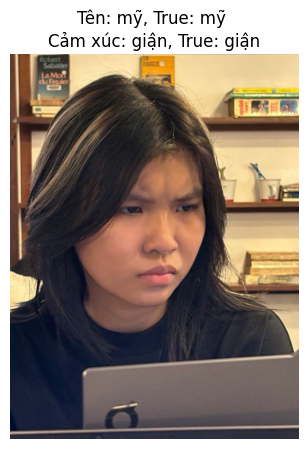

In [72]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/Face recognition 2/test/mỹ_giận/img_2.jpg'
path = os.path.basename(os.path.dirname(img_path))
# Tách tên và cảm xúc
true_name, true_emotion = path.split('_')

# Load ảnh và chuẩn hóa
img_display = load_img(img_path) # ảnh gốc
img = load_img(img_path, target_size=(64, 64))  # Thay đổi kích thước ảnh về (64, 64)
img_array = img_to_array(img) / 255.0  # Chuẩn hóa ảnh
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch (1, 64, 64, 3)
# Dự đoán tên
pred_name = model_name.predict(img_array)
decoded_name = le_name.inverse_transform([np.argmax(pred_name)])

# Dự đoán cảm xúc
pred_emotion = model_emotion.predict(img_array)
decoded_emotion = le_emotion.inverse_transform([np.argmax(pred_emotion)])

plt.figure(figsize=(5, 5))
plt.imshow(img_display)
plt.axis('off')  # Tắt trục tọa độ
plt.title(f"Tên: {decoded_name[0]}, True: {true_name} \nCảm xúc: {decoded_emotion[0]}, True: {true_emotion}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


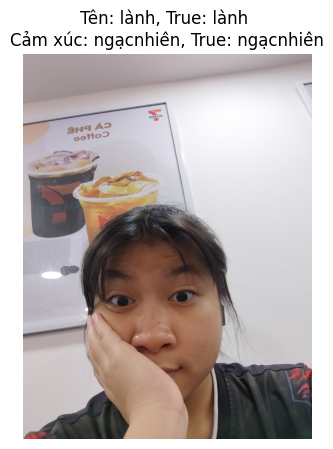

In [88]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/Face recognition 2/test/lành_ngạcnhiên/IMG_20250420_135105.jpg'
path = os.path.basename(os.path.dirname(img_path))
# Tách tên và cảm xúc
true_name, true_emotion = path.split('_')

# Load ảnh và chuẩn hóa
img_display = load_img(img_path) # ảnh gốc
img = load_img(img_path, target_size=(64, 64))  # Thay đổi kích thước ảnh về (64, 64)
img_array = img_to_array(img) / 255.0  # Chuẩn hóa ảnh
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch (1, 64, 64, 3)
# Dự đoán tên
pred_name = model_name.predict(img_array)
decoded_name = le_name.inverse_transform([np.argmax(pred_name)])

# Dự đoán cảm xúc
pred_emotion = model_emotion.predict(img_array)
decoded_emotion = le_emotion.inverse_transform([np.argmax(pred_emotion)])

plt.figure(figsize=(5, 5))
plt.imshow(img_display)
plt.axis('off')  # Tắt trục tọa độ
plt.title(f"Tên: {decoded_name[0]}, True: {true_name} \nCảm xúc: {decoded_emotion[0]}, True: {true_emotion}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


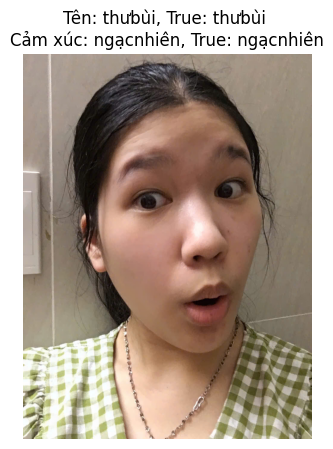

In [76]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/Face recognition 2/test/thưbùi_ngạcnhiên/img_1.jpg'
path = os.path.basename(os.path.dirname(img_path))
# Tách tên và cảm xúc
true_name, true_emotion = path.split('_')

# Load ảnh và chuẩn hóa
img_display = load_img(img_path) # ảnh gốc
img = load_img(img_path, target_size=(64, 64))  # Thay đổi kích thước ảnh về (64, 64)
img_array = img_to_array(img) / 255.0  # Chuẩn hóa ảnh
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch (1, 64, 64, 3)
# Dự đoán tên
pred_name = model_name.predict(img_array)
decoded_name = le_name.inverse_transform([np.argmax(pred_name)])

# Dự đoán cảm xúc
pred_emotion = model_emotion.predict(img_array)
decoded_emotion = le_emotion.inverse_transform([np.argmax(pred_emotion)])

plt.figure(figsize=(5, 5))
plt.imshow(img_display)
plt.axis('off')  # Tắt trục tọa độ
plt.title(f"Tên: {decoded_name[0]}, True: {true_name} \nCảm xúc: {decoded_emotion[0]}, True: {true_emotion}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


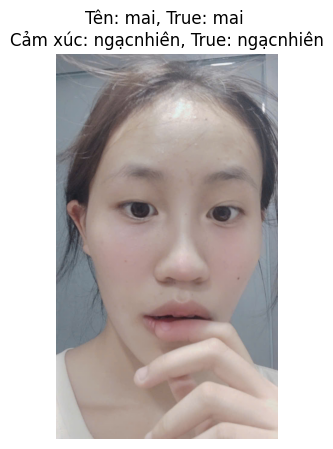

In [77]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = '/content/drive/MyDrive/Face recognition 2/test/mai_ngạcnhiên/img_2.jpg'
path = os.path.basename(os.path.dirname(img_path))
# Tách tên và cảm xúc
true_name, true_emotion = path.split('_')

# Load ảnh và chuẩn hóa
img_display = load_img(img_path) # ảnh gốc
img = load_img(img_path, target_size=(64, 64))  # Thay đổi kích thước ảnh về (64, 64)
img_array = img_to_array(img) / 255.0  # Chuẩn hóa ảnh
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch (1, 64, 64, 3)
# Dự đoán tên
pred_name = model_name.predict(img_array)
decoded_name = le_name.inverse_transform([np.argmax(pred_name)])

# Dự đoán cảm xúc
pred_emotion = model_emotion.predict(img_array)
decoded_emotion = le_emotion.inverse_transform([np.argmax(pred_emotion)])

plt.figure(figsize=(5, 5))
plt.imshow(img_display)
plt.axis('off')  # Tắt trục tọa độ
plt.title(f"Tên: {decoded_name[0]}, True: {true_name} \nCảm xúc: {decoded_emotion[0]}, True: {true_emotion}")
plt.show()
